`Objective:`

-The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). 

-The dataset  contains  around  40 independent variables and 4000 data points. 

`Data description:`

ID - A unique ID to identify a candidate

Salary - Annual CTC oﬀered to the candidate (in INR)

DOJ - Date of joining the company

DOL - Date of leaving the company

Designation - Designation oﬀered in the job

JobCity - Location of the job (city)

Gender - Candidate’s gender

DOB - Date of birth of candidate

10percentage - Overall marks obtained in grade 10 examinations

10board - The school board whose curriculum the candidate followed in grade 10

12graduation - Year of graduation - senior year high school

12percentage - Overall marks obtained in grade 12 examinations

12board - The school board whose curriculum the candidate followed in grade 12

CollegeID - Unique ID identifying the college which the candidate attended

CollegeTier - Tier of college

Degree - Degree obtained/pursued by the candidate

Specialization - Specialization pursued by the candidate

CollegeGPA - Aggregate GPA at graduation

CollegeCityID - A unique ID to identify the city in which the college is located in

CollegeCityTier - The tier of the city in which the college is located

CollegeState - Name of States

GraduationYear - Year of graduation (Bachelor’s degree)

English - Scores in AMCAT English section

Logical - Scores in AMCAT Logical section

Quant - Scores in AMCAT Quantitative section

Domain - Scores in AMCAT’s domain module

ComputerProgramming - Score in AMCAT’s Computer programming section

ElectronicsAndSemicon - Score in AMCAT’s Electronics & Semiconductor Engineering section

ComputerScience - Score in AMCAT’s Computer Science section

MechanicalEngg - Score in AMCAT’s Mechanical Engineering section

ElectricalEngg - Score in AMCAT’s Electrical Engineering section

TelecomEngg - Score in AMCAT’s Telecommunication Engineering section

CivilEngg - Score in AMCAT’s Civil Engineering section

conscientiousness - Scores in one of the sections of AMCAT’s personality test

agreeableness - Scores in one of the sections of AMCAT’s personality test

extraversion - Scores in one of the sections of AMCAT’s personality test

neuroticism - Scores in one of the sections of AMCAT’s personality test

openess_to_experience - Scores in one of the sections of AMCAT’s personality test

**Importing libraries**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

**Load the data**

In [2]:
data=pd.read_excel(r"C:\Users\mythi\Downloads\aspiring_minds_employability_outcomes_2015.xlsx")
data.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

**Removing unwanted columns**

In [4]:
data.drop(columns=['Unnamed: 0','ID','CollegeID','CollegeCityID'],inplace=True)
data.head()

Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01              present   senior quality engineer   
1   500000 2013-09-01              present         assistant manager   
2   325000 2014-06-01              present          systems engineer   
3  1100000 2011-07-01              present  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   12graduation  ...  ComputerScience MechanicalEngg  ElectricalEngg  \
0          2007  ...               -1             -1              -1   
1          2007  ...               -1             -1              -1   
2          2010  ...               -1             -1              -1   
3          2007  ...               -1             -1              -1   
4          2008  ...               -1             -1              -1   

  TelecomEngg CivilEngg  conscientiousness  agreeableness extraversion  \
0          -1        -1             0.9737         0.8128       0.5269   
1          -1        -1            -0.7335         0.3789       1.2396   
2          -1        -1             0.2718         1.7109       0.1637   
3          -1        -1             0.0464         0.3448      -0.3440   
4          -1        -1            -0.8810        -0.2793      -1.0697   

   nueroticism  openess_to_experience  
0      1.35490                -0.4455  
1     -0.10760                 0.8637  
2     -0.86820                 0.6721  
3     -0.40780                -0.9194  
4      0.09163                -0.1295  

[5 rows x 35 columns]

In [5]:
data.shape

(3998, 35)

In [6]:
 data.describe().T

count           mean            std         min  \
Salary                 3998.0  307699.849925  212737.499957  35000.0000   
10percentage           3998.0      77.925443       9.850162     43.0000   
12graduation           3998.0    2008.087544       1.653599   1995.0000   
12percentage           3998.0      74.466366      10.999933     40.0000   
CollegeTier            3998.0       1.925713       0.262270      1.0000   
collegeGPA             3998.0      71.486171       8.167338      6.4500   
CollegeCityTier        3998.0       0.300400       0.458489      0.0000   
GraduationYear         3998.0    2012.105803      31.857271      0.0000   
English                3998.0     501.649075     104.940021    180.0000   
Logical                3998.0     501.598799      86.783297    195.0000   
Quant                  3998.0     513.378189     122.302332    120.0000   
Domain                 3998.0       0.510490       0.468671     -1.0000   
ComputerProgramming    3998.0     353.102801     205.355519     -1.0000   
ElectronicsAndSemicon  3998.0      95.328414     158.241218     -1.0000   
ComputerScience        3998.0      90.742371     175.273083     -1.0000   
MechanicalEngg         3998.0      22.974737      98.123311     -1.0000   
ElectricalEngg         3998.0      16.478739      87.585634     -1.0000   
TelecomEngg            3998.0      31.851176     104.852845     -1.0000   
CivilEngg              3998.0       2.683842      36.658505     -1.0000   
conscientiousness      3998.0      -0.037831       1.028666     -4.1267   
agreeableness          3998.0       0.146496       0.941782     -5.7816   
extraversion           3998.0       0.002763       0.951471     -4.6009   
nueroticism            3998.0      -0.169033       1.007580     -2.6430   
openess_to_experience  3998.0      -0.138110       1.008075     -7.3757   

                                 25%            50%            75%  \
Salary                 180000.000000  300000.000000  370000.000000   
10percentage               71.680000      79.150000      85.670000   
12graduation             2007.000000    2008.000000    2009.000000   
12percentage               66.000000      74.400000      82.600000   
CollegeTier                 2.000000       2.000000       2.000000   
collegeGPA                 66.407500      71.720000      76.327500   
CollegeCityTier             0.000000       0.000000       1.000000   
GraduationYear           2012.000000    2013.000000    2014.000000   
English                   425.000000     500.000000     570.000000   
Logical                   445.000000     505.000000     565.000000   
Quant                     430.000000     515.000000     595.000000   
Domain                      0.342315       0.622643       0.842248   
ComputerProgramming       295.000000     415.000000     495.000000   
ElectronicsAndSemicon      -1.000000      -1.000000     233.000000   
ComputerScience            -1.000000      -1.000000      -1.000000   
MechanicalEngg             -1.000000      -1.000000      -1.000000   
ElectricalEngg             -1.000000      -1.000000      -1.000000   
TelecomEngg                -1.000000      -1.000000      -1.000000   
CivilEngg                  -1.000000      -1.000000      -1.000000   
conscientiousness          -0.713525       0.046400       0.702700   
agreeableness              -0.287100       0.212400       0.812800   
extraversion               -0.604800       0.091400       0.672000   
nueroticism                -0.868200      -0.234400       0.526200   
openess_to_experience      -0.669200      -0.094300       0.502400   

                                max  
Salary                 4.000000e+06  
10percentage           9.776000e+01  
12graduation           2.013000e+03  
12percentage           9.870000e+01  
CollegeTier            2.000000e+00  
collegeGPA             9.993000e+01  
CollegeCityTier        1.000000e+00  
GraduationYear         2.017000e+03  
English                8.750000e+02  
Logical          

**Data preprocessing:**

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

**Checking Null values**

In [9]:
Null=[]
for i in data:
    value=data[i].isin([-1,'NaN',0]).sum()
    Null.append([f'{i}:{value}'])
print(*Null,sep='\n')    

['Salary:0']
['DOJ:0']
['DOL:0']
['Designation:0']
['JobCity:461']
['Gender:0']
['DOB:0']
['10percentage:0']
['10board:350']
['12graduation:0']
['12percentage:0']
['12board:359']
['CollegeTier:0']
['Degree:0']
['Specialization:0']
['collegeGPA:0']
['CollegeCityTier:2797']
['CollegeState:0']
['GraduationYear:1']
['English:0']
['Logical:0']
['Quant:0']
['Domain:246']
['ComputerProgramming:868']
['ElectronicsAndSemicon:2854']
['ComputerScience:3096']
['MechanicalEngg:3763']
['ElectricalEngg:3837']
['TelecomEngg:3624']
['CivilEngg:3956']
['conscientiousness:0']
['agreeableness:0']
['extraversion:0']
['nueroticism:0']
['openess_to_experience:0']


**Converting the 10 and 12 Boards to ['CBSE' , 'ICSE' , 'STATE' , 'N/A']**

In [10]:
def convert_board(Board):
    CBSE = ['cbse' , 'all india board' , 'central board of secondary education, new delhi' , 'cbese']
    ICSE = ['isc', 'icse', 'isc board', 'isce', 'cicse','isc board , new delhi']
    
    for i in data[Board]:
        if i in CBSE:
            data[Board].replace(i,'cbse' , inplace=True)
        elif i in ICSE:
            data[Board].replace(i,'icse' , inplace=True)
        elif i == 0 or i == 'n/a':
            data[Board].replace(i,'n/a' , inplace=True)
        else:
            data[Board].replace(i,'state' , inplace=True)

    return data[Board].unique()

In [11]:
data['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [12]:
data['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [13]:
print(convert_board('10board'))

['state' 'cbse' 'icse' 'n/a']


In [14]:
print(convert_board('12board'))

['state' 'cbse' 'icse' 'n/a']


In [15]:
data.JobCity.value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [17]:
data['JobCity'] = data['JobCity'].str.replace('-1','Unknown')

In [18]:
data.JobCity.value_counts()

Bangalore           627
Noida               368
Hyderabad           335
Pune                290
Chennai             272
                   ... 
Asansol               1
Tirunelvelli          1
Ernakulam             1
Nanded                1
Asifabadbanglore      1
Name: JobCity, Length: 338, dtype: int64

In [19]:
data.DOL

0                   present
1                   present
2                   present
3                   present
4       2015-03-01 00:00:00
               ...         
3993    2012-10-01 00:00:00
3994    2013-07-01 00:00:00
3995                present
3996    2015-01-01 00:00:00
3997                present
Name: DOL, Length: 3998, dtype: object

In [20]:
data['DOL'] = data['DOL'].astype(str)
data['DOL'] = data['DOL'].str.replace('present','2015-12-31 00:00:00')

In [21]:
data.DOL

0       2015-12-31 00:00:00
1       2015-12-31 00:00:00
2       2015-12-31 00:00:00
3       2015-12-31 00:00:00
4       2015-03-01 00:00:00
               ...         
3993    2012-10-01 00:00:00
3994    2013-07-01 00:00:00
3995    2015-12-31 00:00:00
3996    2015-01-01 00:00:00
3997    2015-12-31 00:00:00
Name: DOL, Length: 3998, dtype: object

In [22]:
data.DOJ

0      2012-06-01
1      2013-09-01
2      2014-06-01
3      2011-07-01
4      2014-03-01
          ...    
3993   2011-10-01
3994   2013-07-01
3995   2013-07-01
3996   2014-07-01
3997   2013-02-01
Name: DOJ, Length: 3998, dtype: datetime64[ns]

In [23]:
data['DOL'] = pd.to_datetime(data['DOL'])
data['Experience'] = data['DOL'] - data['DOJ']

In [24]:
data['Age'] = data['DOL'] - data['DOB']
data['Age'] = data['Age'].astype(str)

In [25]:
data['Experience'] = ((data['DOL'] - data['DOJ']).map(lambda x: round(x.days/365)))

In [26]:
data.Experience.unique()

array([ 4,  2,  5,  1,  3,  0, -1,  6, 10, 25,  9], dtype=int64)

In [27]:
data['Experience'] = data['Experience'].replace(-1,0)

In [28]:
data.Age

0       9446 days
1       9584 days
2       8550 days
3       9522 days
4       8768 days
          ...    
3993    9301 days
3994    7613 days
3995    8947 days
3996    8322 days
3997    9074 days
Name: Age, Length: 3998, dtype: object

In [29]:
data['Age'] = ((data['DOL'] - data['DOB']).map(lambda x: round(x.days/365)))

In [30]:
data.Age.unique()

array([26, 23, 24, 22, 25, 27, 21, 29, 35, 28, 18, 20, 19, 30, 31, 33, 32],
      dtype=int64)

In [31]:
data['Age'] = data['Age'].astype(int)
data['Experience'] = data['Experience'].astype(int)

`Univariate Analysis:`
    

**Histplot**

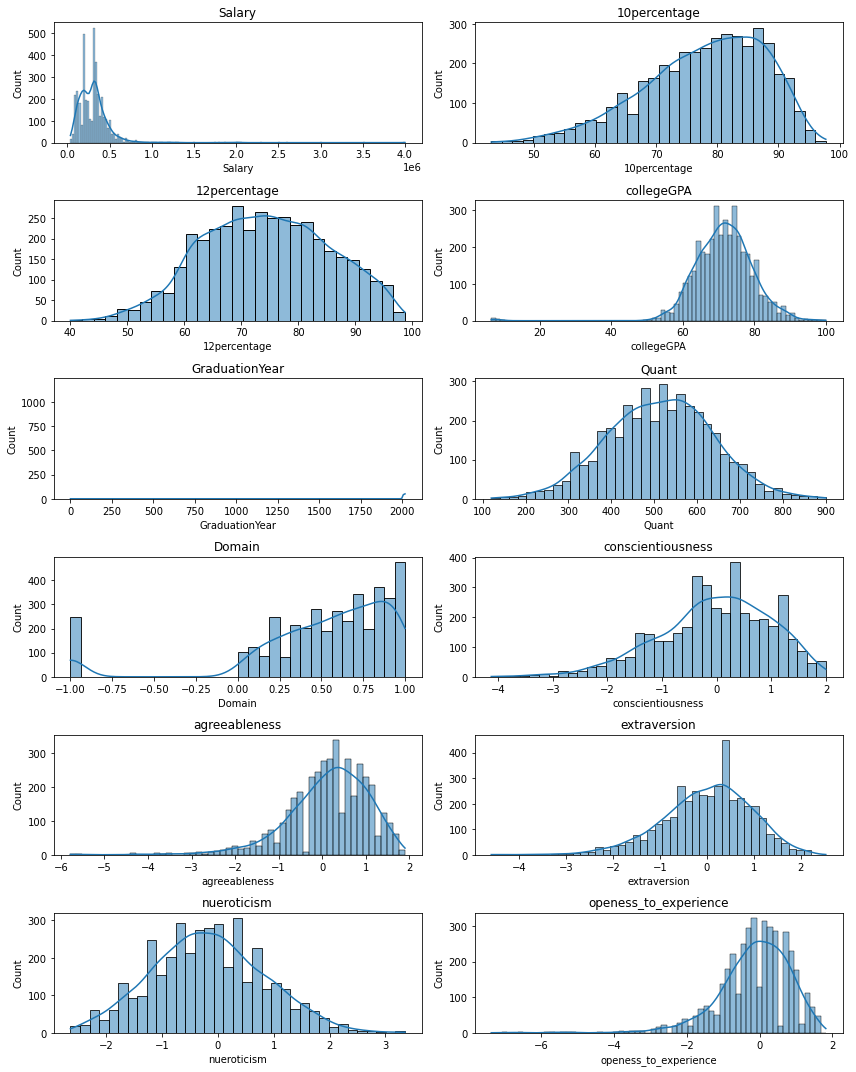

In [32]:
num_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'GraduationYear', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,15))
for col, ax in zip(num_cols, axes.flatten()):
    sns.histplot(x=data[col], ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout()

`Observation:`It is observed that the numerical columns are normally distributed. But, some columns like GraduationYear, Domain, agreeableness and openees_to_experience are not normally distributed.

**Boxplot**

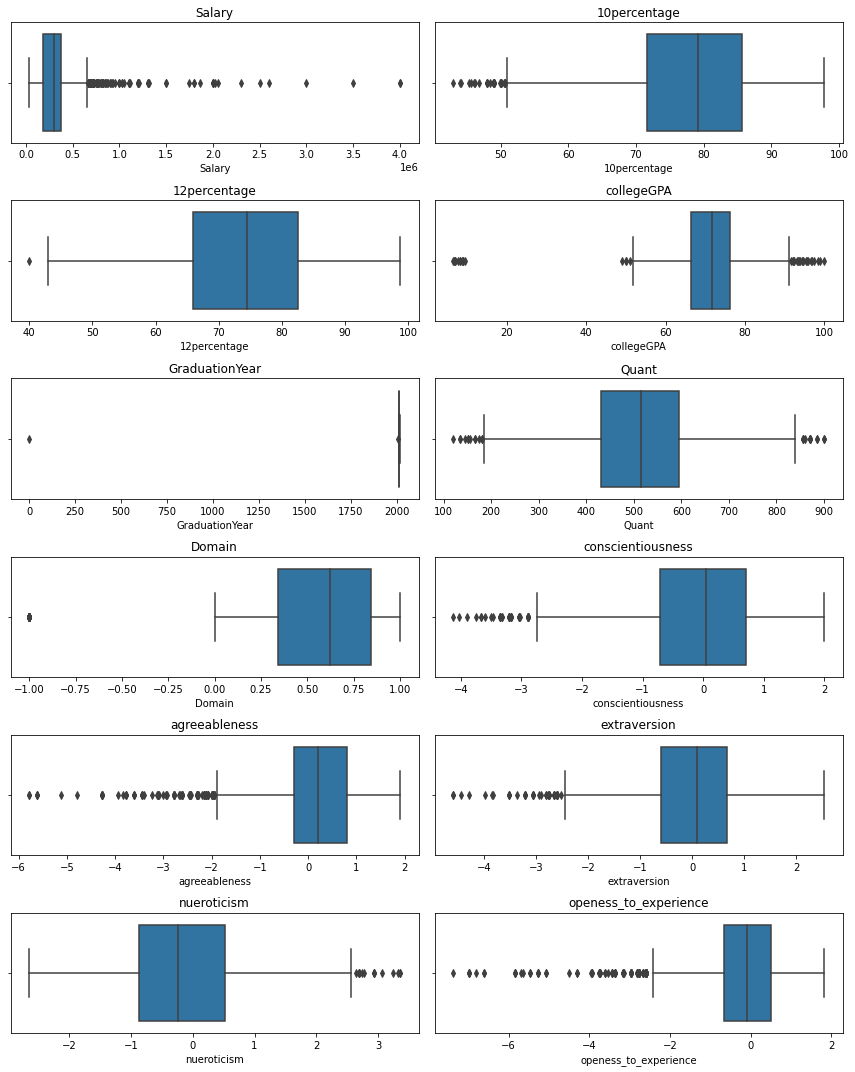

In [33]:
#Detecting outliers for numerical columns

num_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'GraduationYear', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,15))
for col, ax in zip(num_cols, axes.flatten()):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()

`Observation:`From the above outliers can be easy detected and removed by using IQR,z-score methods etc..

**Removing outliers**

In [34]:
for i in range (1,8):
    seriesObj=data.apply(lambda x:True if x['Salary']<=250000*i else False,axis=1)
    no_of_rows=len(seriesObj[seriesObj == True].index)
    print('No.of Rows in dataframe in which Salary %d:'%((250000*i)),no_of_rows)

No.of Rows in dataframe in which Salary 250000: 1710
No.of Rows in dataframe in which Salary 500000: 3683
No.of Rows in dataframe in which Salary 750000: 3929
No.of Rows in dataframe in which Salary 1000000: 3962
No.of Rows in dataframe in which Salary 1250000: 3975
No.of Rows in dataframe in which Salary 1500000: 3981
No.of Rows in dataframe in which Salary 1750000: 3982


In [35]:
indexNames=data[data['Salary']>1000000].index
data.drop(indexNames,inplace=True)
data.shape

(3962, 37)

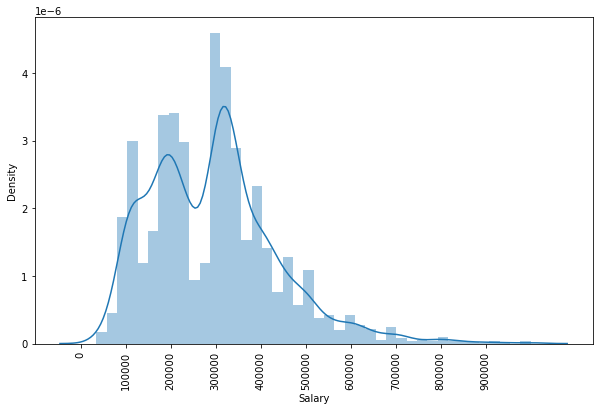

In [36]:
x=data['Salary']
plt.figure(figsize=(10,6))
plt.xticks(np.arange(0,1000000,100000),rotation=90)
sns.distplot(x);

`Observation:`As we can see most of the salary is in between 0 to 1000000 we can consider the rest of the salary as an outlier and can remove the col with such a salary

**Removing the outliers from 10 12 Grad Percentage**

In [37]:
def IQR_detect(col):
    print("shape:",data.shape)
    upper = []
    lower = []
        
    for i in col:
        print(i)
        Q1 = np.percentile(data[i], 25,
                       interpolation = 'midpoint')

        Q3 = np.percentile(data[i], 75,
                           interpolation = 'midpoint')
        IQR = Q3 - Q1

        u = np.where(data[i] >= (Q3+1.5*IQR))
        l = np.where(data[i] <= (Q1-1.5*IQR))
        
        print(u , l)
        
        for i in u[0]:
            upper.append(i)
        for j in l[0]:
            lower.append(j)
        
    remove_IQR_detect(upper , lower)
        
def remove_IQR_detect(upper , lower):
    
    data.drop(upper, inplace = True)
    data.drop(lower, inplace = True)

In [38]:
x = ['10percentage','12percentage','collegeGPA']

IQR_detect(x)
print("New Shape: ", data.shape)

shape: (3962, 37)
10percentage
(array([], dtype=int64),) (array([ 241,  460,  484,  485,  495,  593,  606,  888,  909, 1051, 1089,
       1156, 1180, 1222, 1319, 1820, 1827, 1937, 1958, 2017, 2192, 2267,
       2407, 2627, 2855, 2952, 3251, 3392, 3655, 3707], dtype=int64),)
12percentage
(array([], dtype=int64),) (array([3304], dtype=int64),)
collegeGPA
(array([  43,  183,  471,  607,  683,  864,  948, 1016, 1121, 1249, 1330,
       1495, 1669, 2438, 2675, 2958, 3120, 3290, 3797, 3814], dtype=int64),) (array([   6,  135,  778,  897, 1404, 1424, 1749, 2130, 2205, 2268, 2634,
       2663, 2807, 3260, 3275, 3415], dtype=int64),)
New Shape:  (3895, 37)


**Distribution plot**

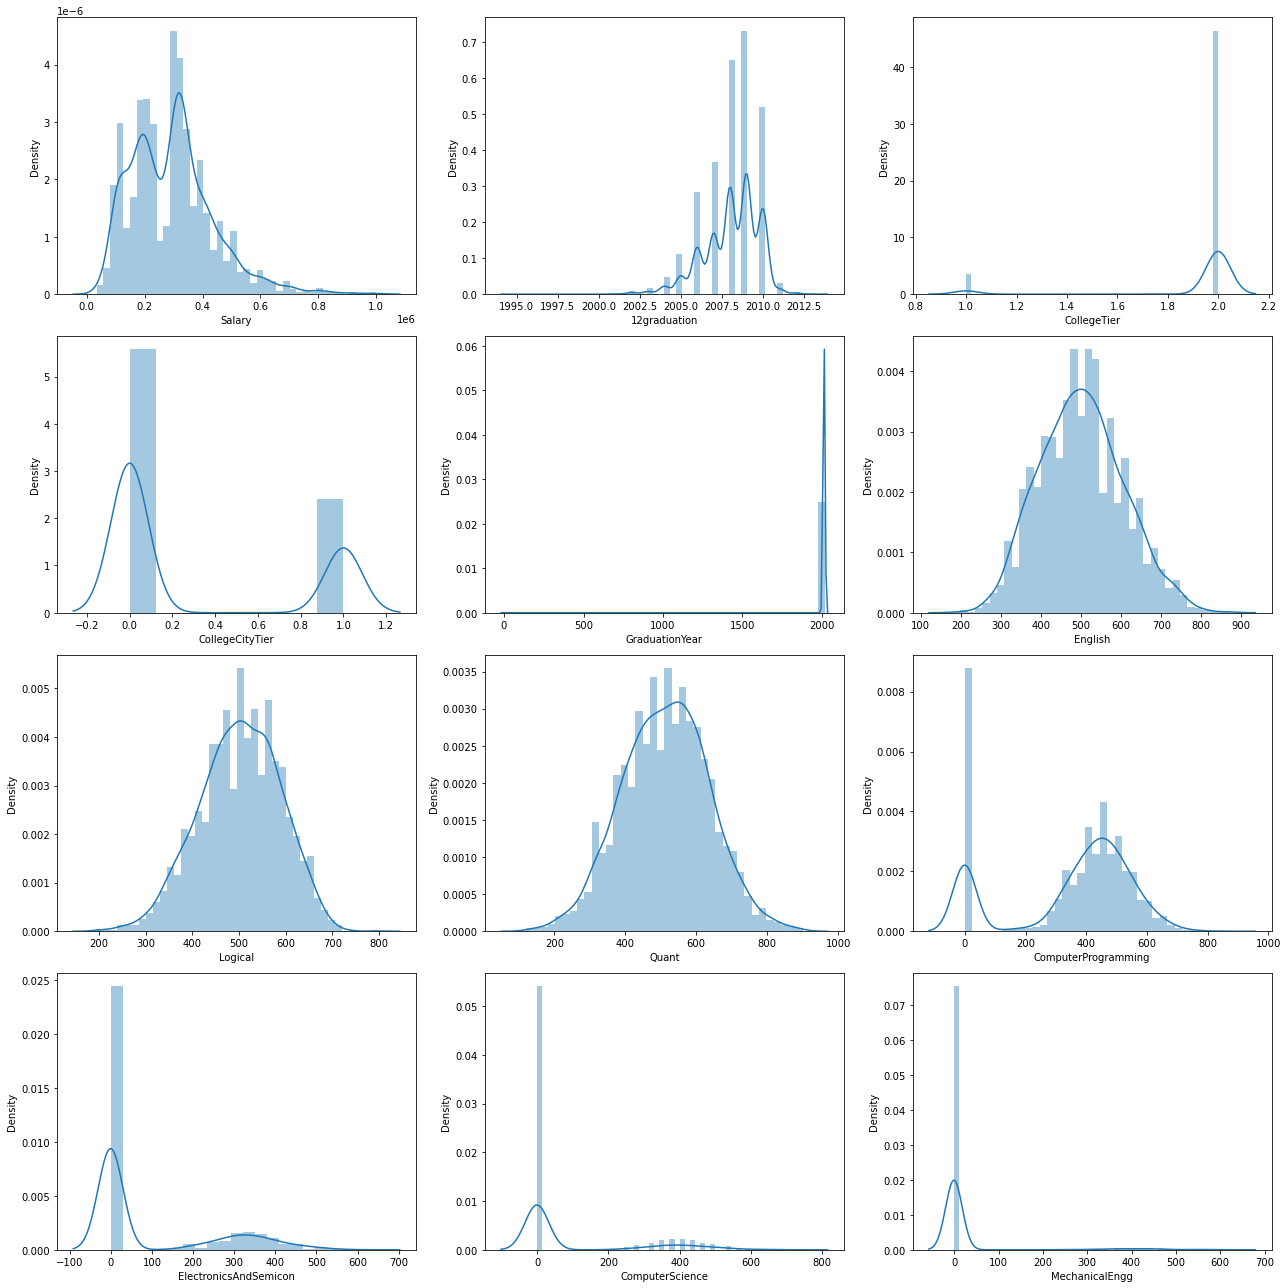

In [39]:
#Distribution plot

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

l = data.select_dtypes(include=['int64']).columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

for i, ax in enumerate(axes.flatten()):
    if i < len(l):
        sns.distplot(x=data[l[i]], ax=ax)
        ax.set_xlabel(l[i])
    else:
        ax.axis('off')
    
plt.tight_layout()
plt.show()

`Observation:`It is observed from the above various distributions for numerical columns is shown.

**Count plot**

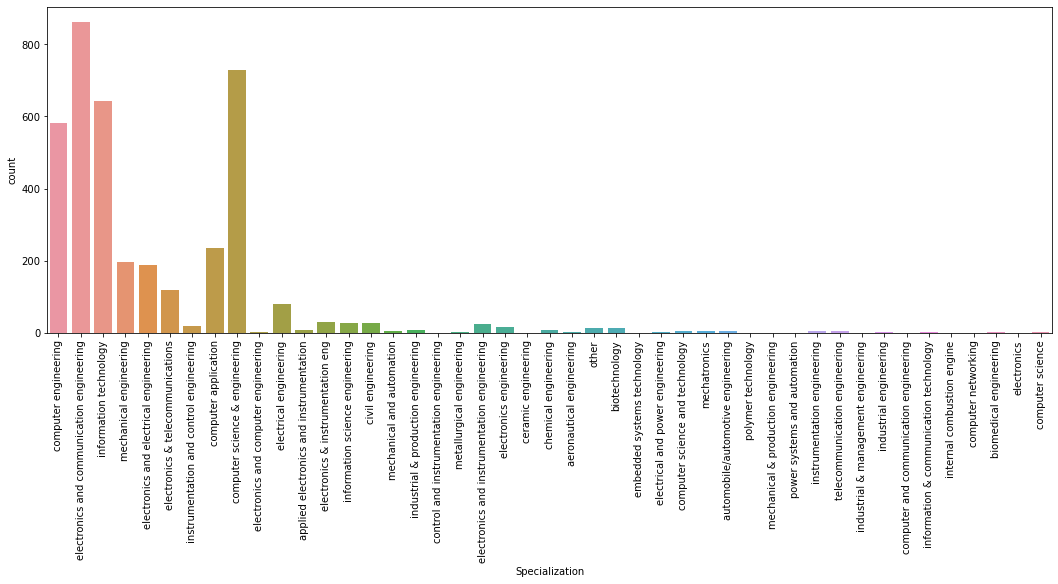

In [40]:
plt.figure(figsize=(18,6))
plt.xticks(rotation = 90)
sns.countplot(data['Specialization']);

`Observation:`It is clear that most of the students are from CE , ECE , IT , CSE , ME and CA.

In [41]:
data.CollegeCityTier.value_counts()

0    2718
1    1177
Name: CollegeCityTier, dtype: int64

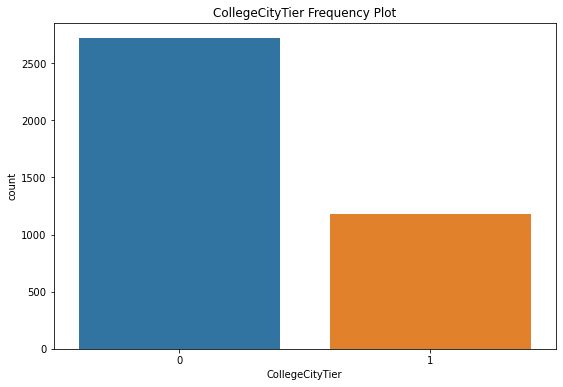

In [42]:
plt.figure(figsize=(9,6))
sns.countplot(x = data['CollegeCityTier'])
plt.title("CollegeCityTier Frequency Plot")
plt.show()

`Observation:`Majoraty of the Candidates are come from CollegeCityTier 0 college.

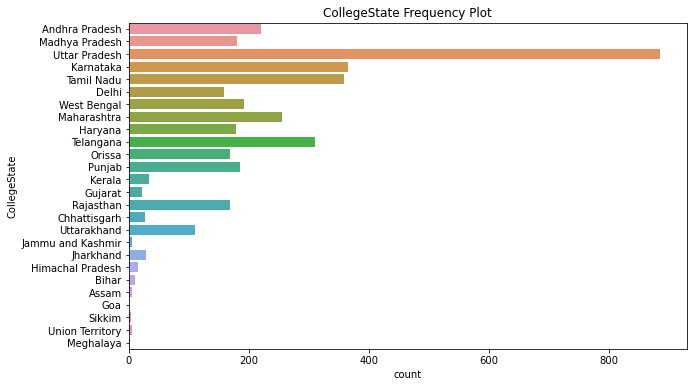

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(y = data['CollegeState'])
plt.title("CollegeState Frequency Plot")
plt.show()

`Observation:`Majoraty of the Candidates are come from Uttar Pradesh.

<AxesSubplot:xlabel='GraduationYear', ylabel='count'>

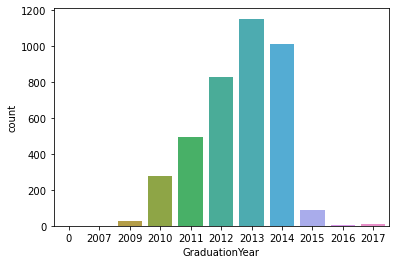

In [44]:
sns.countplot(x=data['GraduationYear'])

`Observation:`From the above most of the students are from 2013,2014 graduated year.

`Bivariate Analysis :`

**Scatterplot**

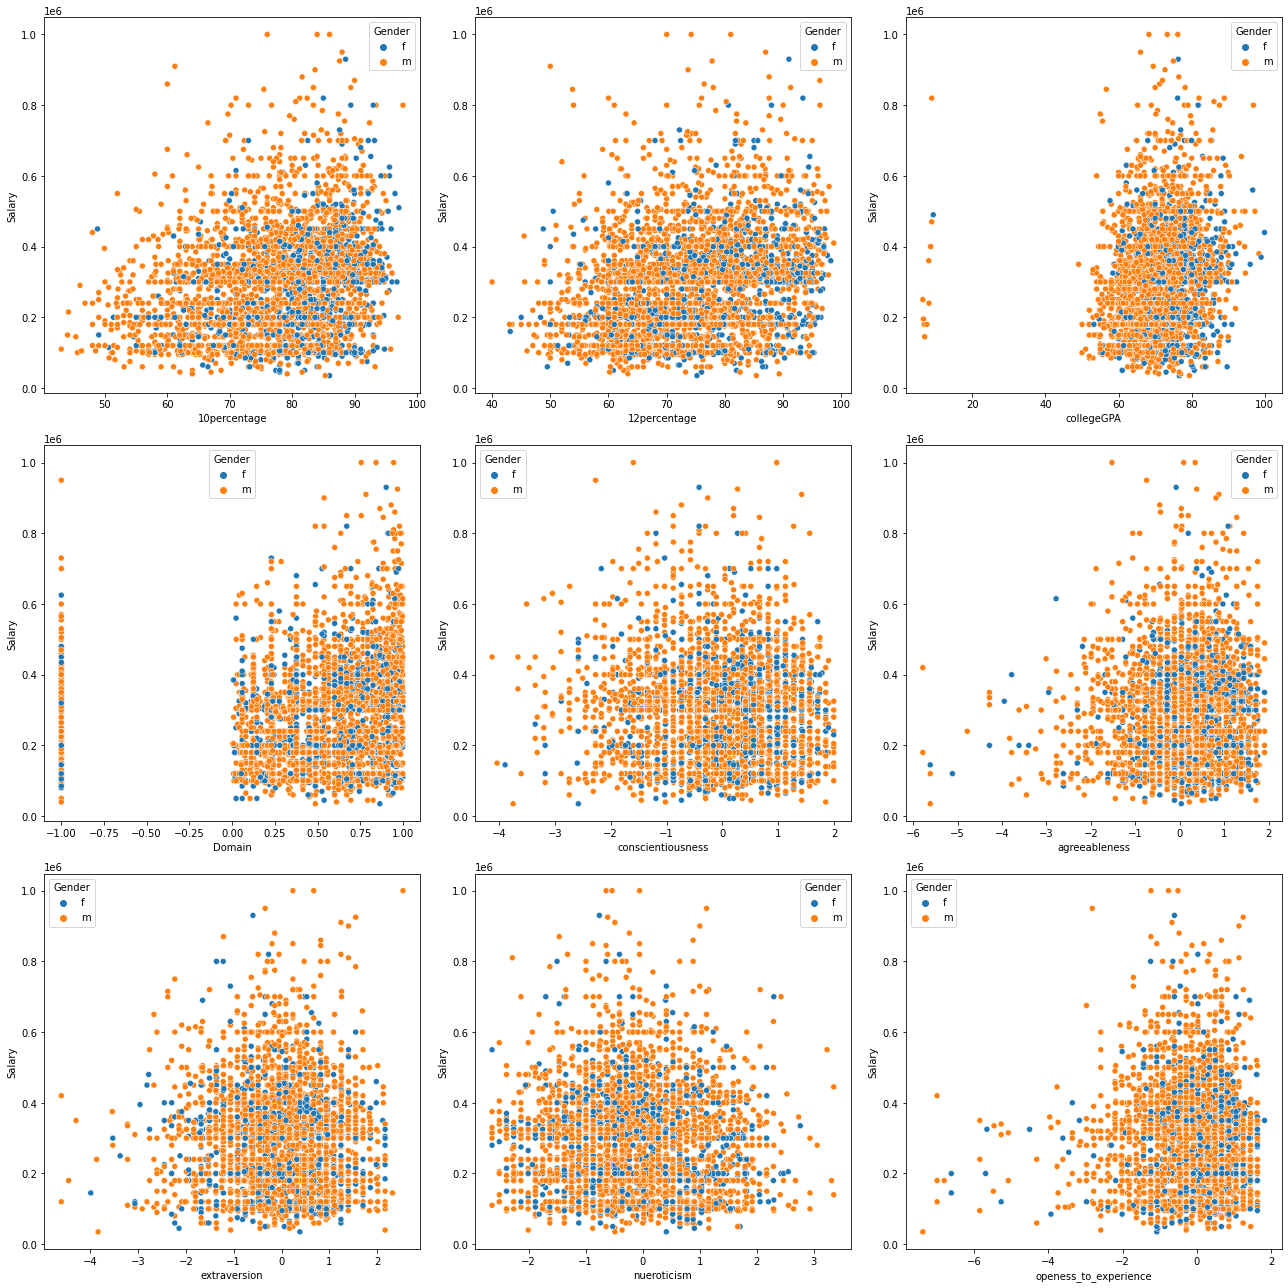

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns of float64 data type
float_cols = data.select_dtypes(include=['float64']).columns

# Define the number of rows and columns for subplots
n_rows = (len(float_cols) + 2) // 3  # Round up to the nearest integer
n_cols = 3

# Create subplots with specified dimensions
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6*n_rows))

# Iterate through float64 columns and create scatter plots
for i, ax in enumerate(axes.flatten()):
    if i < len(float_cols):
        sns.scatterplot(x=data[float_cols[i]], y=data['Salary'],hue=data['Gender'] ,ax=ax)
        ax.set_xlabel(float_cols[i])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

`Observation:`Here we observed that the relation between Salary and other features from dataset and we can see that the 10persentage , collegeGPA, and 12thpercentage of students having some relation with salary and other features are also having slight relation with salary but they are not linear with salary.

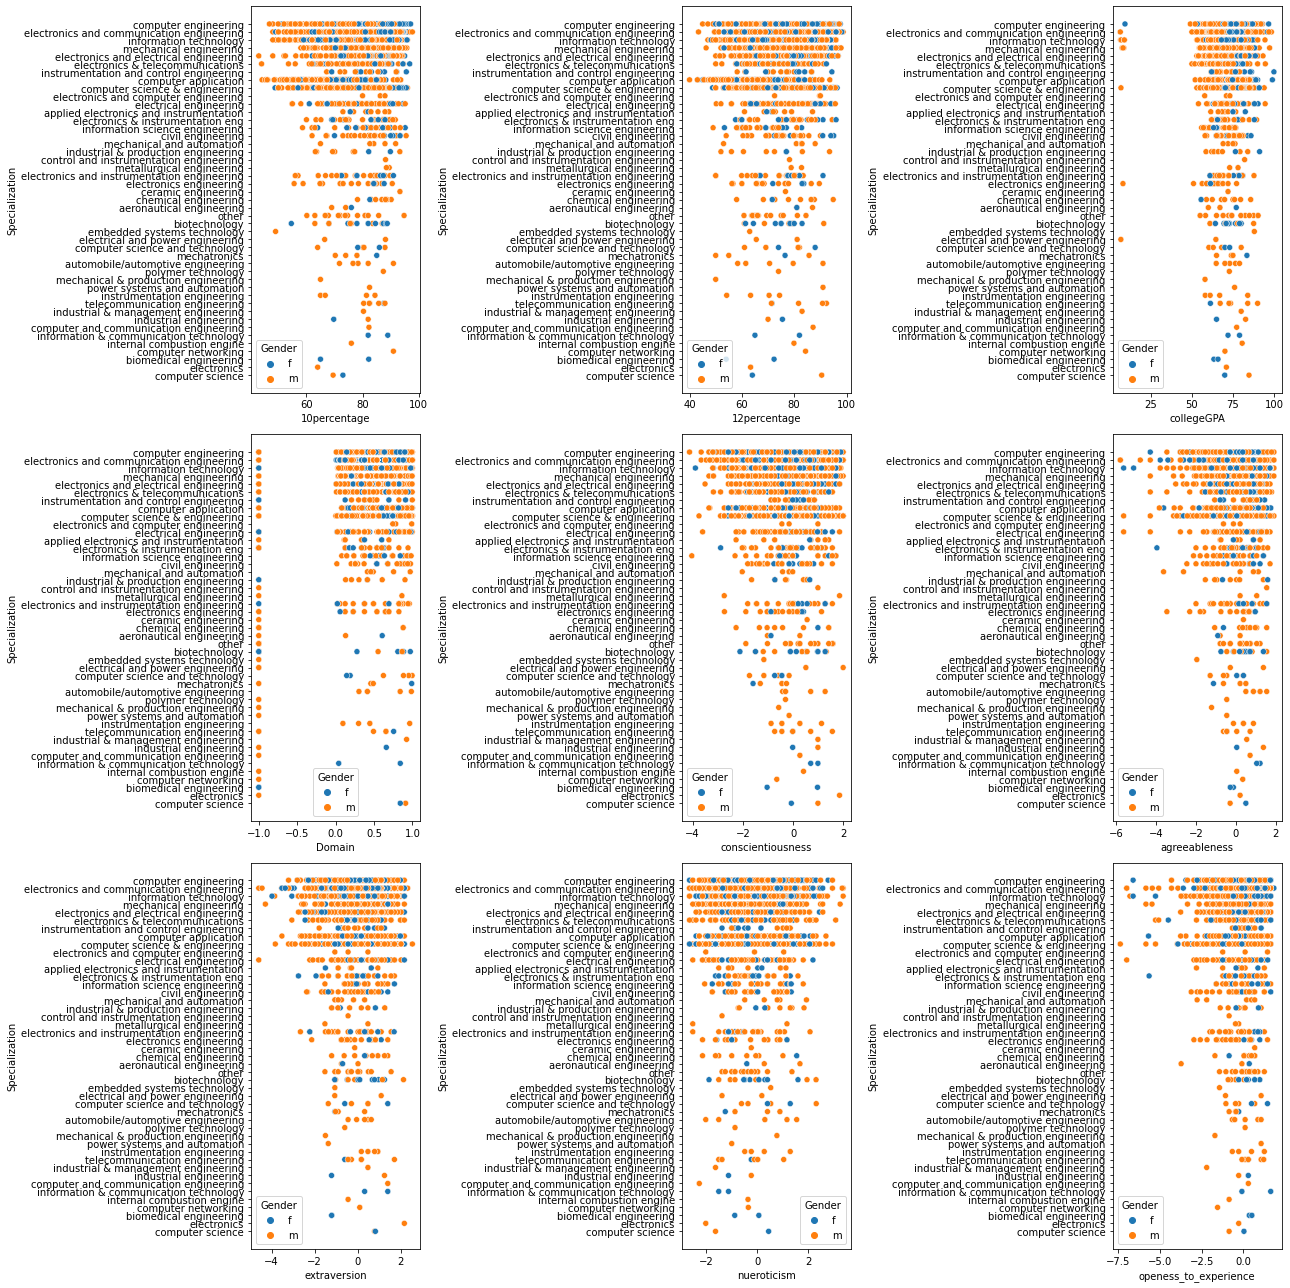

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns of float64 data type
float_cols = data.select_dtypes(include=['float64']).columns

# Define the number of rows and columns for subplots
n_rows = (len(float_cols) + 2) // 3  # Round up to the nearest integer
n_cols = 3

# Create subplots with specified dimensions
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6*n_rows))

# Iterate through float64 columns and create scatter plots
for i, ax in enumerate(axes.flatten()):
    if i < len(float_cols):
        sns.scatterplot(x=data[float_cols[i]], y=data['Specialization'],hue=data['Gender'] ,ax=ax)
        ax.set_xlabel(float_cols[i])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

**Bar plot:**

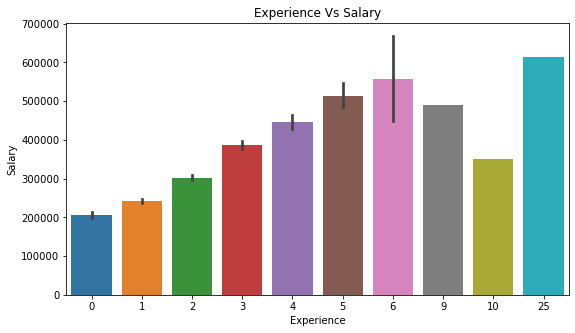

In [47]:
plt.figure(figsize=(9,5))
plt.title('Experience Vs Salary')
sns.barplot(x='Experience',y='Salary',data=data);

`Observation:`From the above having with high experience contains high salary.

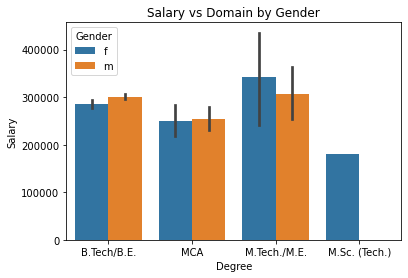

In [48]:
sns.barplot(x='Degree', y='Salary', hue='Gender', data=data)
plt.title('Salary vs Domain by Gender')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

`Observation:`It is observed that student  pursuing with M.Tech/M.E than male ,female taking high salary.

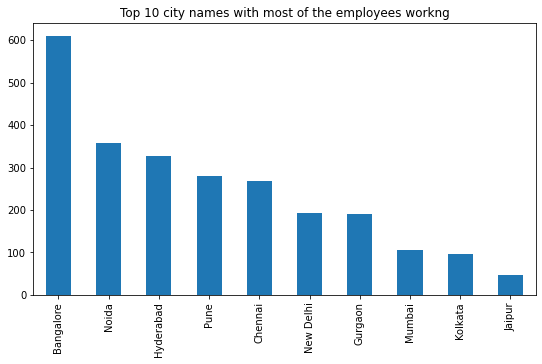

In [49]:
plt.figure(figsize=(9,5))
plt.title('Top 10 city names with most of the employees workng')
data['JobCity'].value_counts()[:10].plot(kind='bar');

`Observation:`Most of the employees are from Banglore.

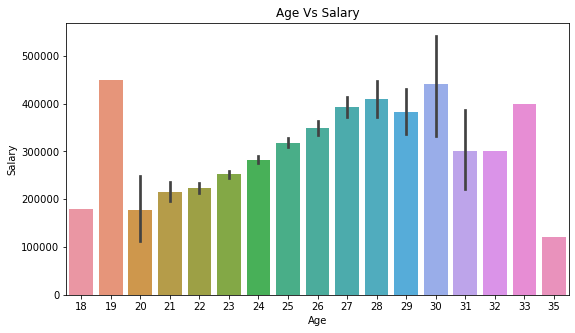

In [50]:
plt.figure(figsize=(9,5))
plt.title('Age Vs Salary')
sns.barplot(x='Age',y='Salary',data=data);

`Observation:`Employee with age of 19years taking high package while with age 35years taking very less package. 

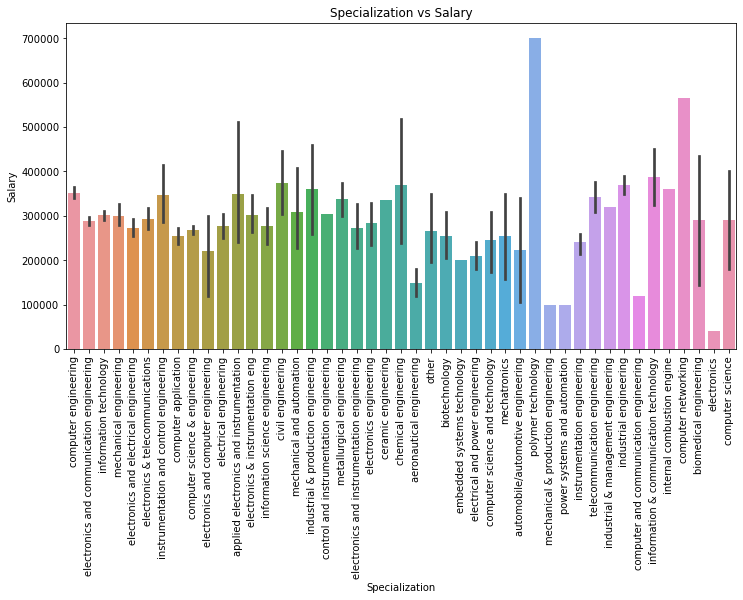

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Specialization vs Salary")
sns.barplot(data=data, x = 'Specialization', y='Salary')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

`Observation:`Employee working in polymer technology having salary than employee working in electronics.

**Hexbin plot**

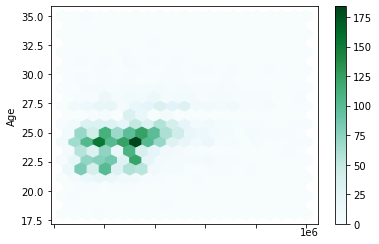

In [52]:
ax = data.plot.hexbin(x='Salary', y='Age', gridsize=20)

`Observation:`We see the darkest hexbin in the bottom , as it is the most dense because balance in the salary and the majority of employees will be centered around this area.As hexbins,the color slowly begins to fade which indicates that there is a decreasing positive relationship between the slary and age of employee.

**Boxplot**

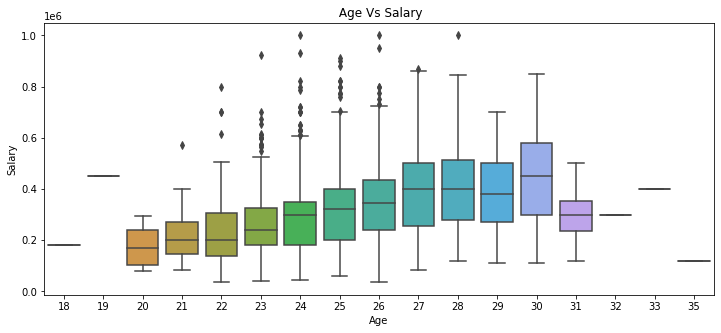

In [53]:
plt.figure(figsize=(12,5))
plt.title(' Age Vs Salary')
sns.boxplot(data=data,x='Age', y='Salary');

`Observation:`24 and 26 had large number of outlier data which concludes there are high salaries at that age group.

**Countplot**

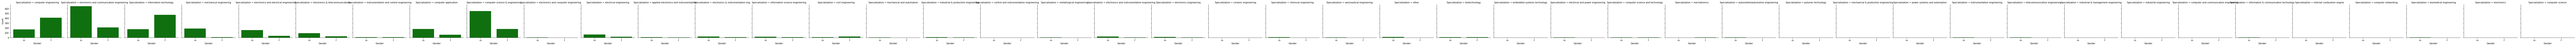

In [54]:
x=sns.FacetGrid(data=data,col='Specialization',height=3,aspect=1.2)
x.map(sns.countplot,'Gender',color='green')
plt.show()

**Heatmap**

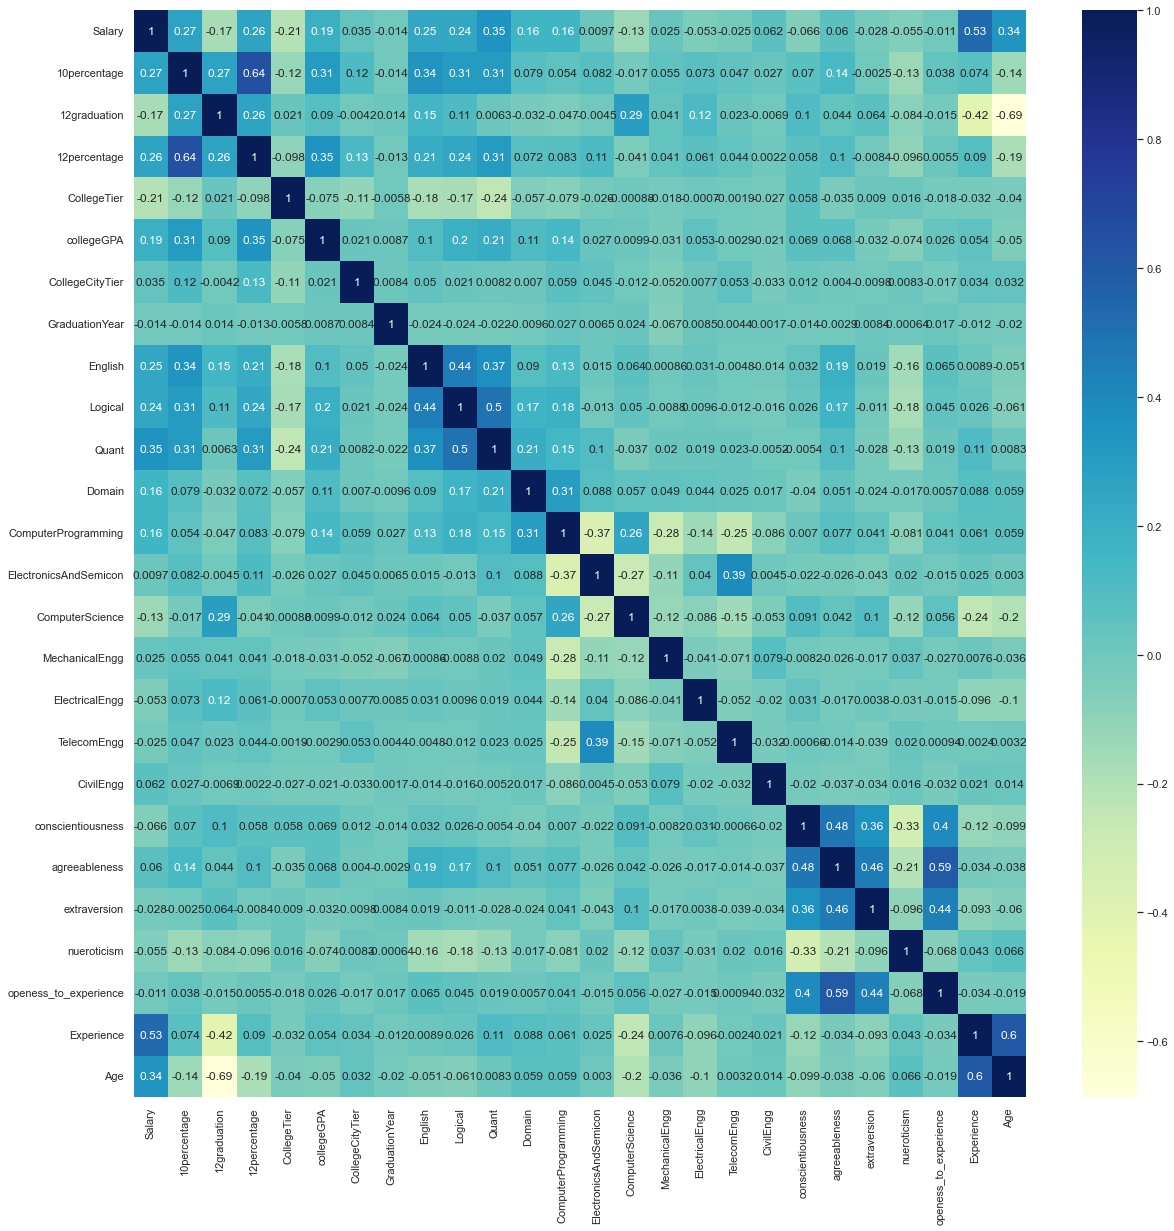

In [55]:
sns.set(style="white")
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

`Observation:`The above heatmap representation shows the correlation of features with each other the darker color shows the strong positive correlation and light color shows the weak correaltion.From the above we can observe that 10percentages of students are correlated with 12th percentage,and Quant scores are correlated with logical scores and openesess to experience is having a strong correlation with agreeableness.

**Pie chart**

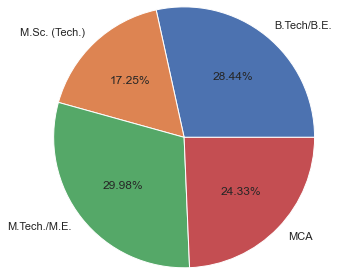

In [56]:
pie=data.groupby(['Degree'])['Salary'].mean()
fig=plt.pie(pie,labels=pie.index,autopct = '%1.2f%%',radius = 1.5)


`Observation:`The above pie chart shows the mean salary of different Degree

**Scatterplot**

In [57]:
import plotly
import plotly.express as px
fig = px.scatter(data, x='Designation', y='Salary')
fig.update_layout(title='Designation vs Salary', xaxis_title='Designation', yaxis_title='Salary')
fig

`Observation:`From the above graph we can observe that there is no such strong relation between Designation and Salary but senior quality engineer and quality assurance tester and android developer are having good salary .


## **Research Questions :**

**Problem Statement-1:**

- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
  Engineering if you take up jobs as a Programming Analyst, Software Engineer,
  Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
  graduate.” Test this claim with the data given to you.

In [72]:
data.head()

Salary        DOJ        DOL              Designation    JobCity Gender  \
0  420000 2012-06-01 2015-12-31  senior quality engineer  Bangalore      f   
1  500000 2013-09-01 2015-12-31        assistant manager     Indore      m   
2  325000 2014-06-01 2015-12-31         systems engineer    Chennai      f   
4  200000 2014-03-01 2015-03-01                      get    Manesar      m   
5  300000 2014-06-01 2015-12-31          system engineer  Hyderabad      m   

         DOB  10percentage 10board  12graduation  ...  ElectricalEngg  \
0 1990-02-19         84.30   state          2007  ...              -1   
1 1989-10-04         85.40    cbse          2007  ...              -1   
2 1992-08-03         85.00    cbse          2010  ...              -1   
4 1991-02-27         78.00    cbse          2008  ...              -1   
5 1992-07-02         89.92   state          2010  ...              -1   

  TelecomEngg  CivilEngg conscientiousness agreeableness  extraversion  \
0          -1         -1            0.9737        0.8128        0.5269   
1          -1         -1           -0.7335        0.3789        1.2396   
2          -1         -1            0.2718        1.7109        0.1637   
4          -1         -1           -0.8810       -0.2793       -1.0697   
5          -1         -1           -0.3027       -0.6201       -2.2954   

   nueroticism openess_to_experience  Experience  Age  
0      1.35490               -0.4455           4   26  
1     -0.10760                0.8637           2   26  
2     -0.86820                0.6721           2   23  
4      0.09163               -0.1295           1   24  
5     -0.74150               -0.8608           2   24  

[5 rows x 37 columns]

In [73]:
data.Designation.value_counts()

software engineer                    523
software developer                   262
system engineer                      203
programmer analyst                   136
systems engineer                     117
                                    ... 
noc engineer                           1
industrial engineer                    1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 417, dtype: int64

In [75]:
(data['DOJ'].dt.year == data['GraduationYear']).value_counts()

True     2225
False    1670
dtype: int64

In [76]:
# group by job title and calculate average salary

salary_by_title = data.groupby('Designation')['Salary'].mean()

# print the result

salary_by_title

Designation
.net developer                   226515.151515
.net web developer               196250.000000
account executive                287500.000000
account manager                  350000.000000
admin assistant                  102500.000000
                                     ...      
web designer and seo             200000.000000
web developer                    167788.461538
web intern                       205000.000000
website developer/tester         200000.000000
windows systems administrator    200000.000000
Name: Salary, Length: 417, dtype: float64

In [87]:
# select rows with specific job titles

job_titles = ['programmer analyst','programmer analyst trainee', 'software engineer associate',
              'software engineer trainee','software engineering associate','hardware engineer', 'associate engineer']

Data = data[data['Designation'].isin(job_titles)]


In [88]:
Data.shape

(34, 37)

In [89]:
Data.head()

Salary        DOJ        DOL                 Designation    JobCity  \
24   335000 2014-06-01 2015-06-01          programmer analyst  Hyderabad   
313  315000 2014-10-01 2015-12-31  programmer analyst trainee    Chennai   
473  335000 2014-05-01 2015-12-31          programmer analyst    Chennai   
530  345000 2014-02-01 2015-04-01          programmer analyst       Pune   
595  180000 2015-03-01 2015-12-31          programmer analyst  Hyderabad   

    Gender        DOB  10percentage 10board  12graduation  ...  \
24       m 1993-06-28          88.0   state          2010  ...   
313      m 1990-11-18          85.0    cbse          2009  ...   
473      m 1989-12-15          66.0   state          2006  ...   
530      m 1991-05-17          72.8    cbse          2009  ...   
595      f 1993-02-03          55.5   state          2010  ...   

     ElectricalEngg TelecomEngg  CivilEngg conscientiousness agreeableness  \
24               -1          -1         -1            0.4155        0.8027   
313              -1          -1         -1           -1.3080       -0.6201   
473              -1          -1         -1            0.5591        1.0449   
530              -1          -1         -1           -1.6538       -0.2012   
595              -1          -1         -1           -1.3080       -2.1186   

     extraversion  nueroticism openess_to_experience  Experience  Age  
24         0.1357      -0.9950               -0.6692           1   22  
313       -0.7585       0.3995               -1.4356           1   25  
473       -0.1437      -0.6147               -0.8608           2   26  
530       -0.2714       1.2374               -1.0774           1   24  
595       -1.2196       0.2727               -1.0524           1   23  

[5 rows x 37 columns]

In [90]:
Data =  data[data['Specialization']=='computer science & engineering']


In [91]:
Data.shape

(34, 37)

In [92]:
Data.head()

Salary        DOJ        DOL                 Designation    JobCity  \
24   335000 2014-06-01 2015-06-01          programmer analyst  Hyderabad   
313  315000 2014-10-01 2015-12-31  programmer analyst trainee    Chennai   
473  335000 2014-05-01 2015-12-31          programmer analyst    Chennai   
530  345000 2014-02-01 2015-04-01          programmer analyst       Pune   
595  180000 2015-03-01 2015-12-31          programmer analyst  Hyderabad   

    Gender        DOB  10percentage 10board  12graduation  ...  \
24       m 1993-06-28          88.0   state          2010  ...   
313      m 1990-11-18          85.0    cbse          2009  ...   
473      m 1989-12-15          66.0   state          2006  ...   
530      m 1991-05-17          72.8    cbse          2009  ...   
595      f 1993-02-03          55.5   state          2010  ...   

     ElectricalEngg TelecomEngg  CivilEngg conscientiousness agreeableness  \
24               -1          -1         -1            0.4155        0.8027   
313              -1          -1         -1           -1.3080       -0.6201   
473              -1          -1         -1            0.5591        1.0449   
530              -1          -1         -1           -1.6538       -0.2012   
595              -1          -1         -1           -1.3080       -2.1186   

     extraversion  nueroticism openess_to_experience  Experience  Age  
24         0.1357      -0.9950               -0.6692           1   22  
313       -0.7585       0.3995               -1.4356           1   25  
473       -0.1437      -0.6147               -0.8608           2   26  
530       -0.2714       1.2374               -1.0774           1   24  
595       -1.2196       0.2727               -1.0524           1   23  

[5 rows x 37 columns]

In [83]:
rq_ = data[['Salary', 'Designation', 'Specialization', 'Gender']]
print('Top Five Rows \n',rq_.head())
print('Total Number of Rows and Columns \n',rq_.shape)
print('<h1>DataTypes \n',rq_.dtypes)

Top Five Rows 
      Salary                 Designation                  Specialization Gender
24   335000          programmer analyst  computer science & engineering      m
313  315000  programmer analyst trainee  computer science & engineering      m
473  335000          programmer analyst  computer science & engineering      m
530  345000          programmer analyst  computer science & engineering      m
595  180000          programmer analyst  computer science & engineering      f
Total Number of Rows and Columns 
 (34, 4)
<h1>DataTypes 
 Salary             int64
Designation       object
Specialization    object
Gender            object
dtype: object


In [84]:
# Grouping the data by Designation and Specialization and calculating the average salary for each group

grouped_df = rq_.groupby(['Designation', 'Specialization']).agg({'Salary': 'mean'}).reset_index()

# Checking if the average salaries are within the range of 2.5-3 lakhs

lower_bound = 250000
upper_bound = 300000
result = (rq_['Salary'] >= lower_bound) & (rq_['Salary'] <= upper_bound)

if result.all():
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")

The claim is not supported by the data.


**Problem statement-2:**

- Is there a relationship between gender and specialisation? (i.e. Does the preference of
  Specialisation depend on the Gender?)

<Figure size 720x504 with 0 Axes>

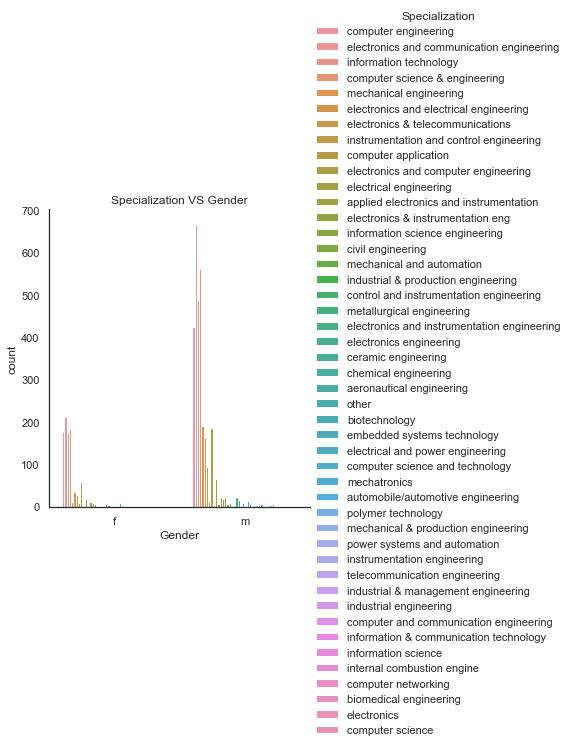

In [97]:
plt.figure(figsize=(10,7))
sns.catplot(x="Gender", hue="Specialization", kind="count", data=data)
plt.title("Specialization VS Gender")
plt.show()


In [98]:
data['Gender'].unique()

array(['f', 'm'], dtype=object)

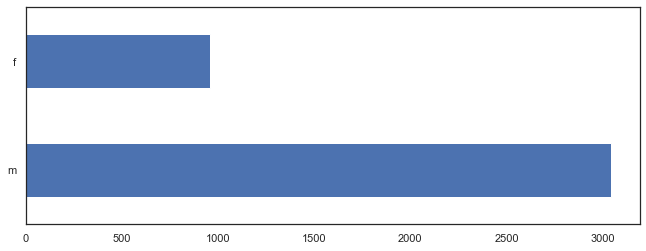

In [99]:
data['Gender'].value_counts().plot(kind='barh', figsize=(11,4))
plt.xticks(rotation=0);


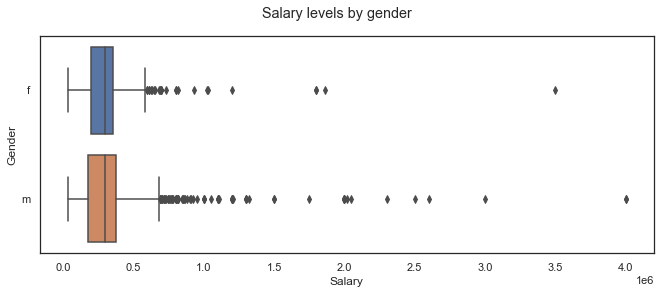

In [101]:
plt.figure(figsize=(11,4))
sns.boxplot(x='Salary', y = 'Gender', data=data)
plt.suptitle('Salary levels by gender')
plt.show()


`Observation :`

   1. Median salary of males is slightly greater than that of females.
   2. If we observe the outliers in boxplot it clearly shows that male had high range of different salaries.


In [102]:
# Calculating the frequency distribution of each specialization based on gender

freq_table = pd.crosstab(data['Gender'], data['Specialization'], margins=True)

# Normalizing the frequency table to get the proportions

freq_table.div(freq_table['All'], axis=0)

Specialization  aeronautical engineering  \
Gender                                     
f                               0.001045   
m                               0.000658   
All                             0.000750   

Specialization  applied electronics and instrumentation  \
Gender                                                    
f                                              0.002090   
m                                              0.002302   
All                                            0.002251   

Specialization  automobile/automotive engineering  biomedical engineering  \
Gender                                                                      
f                                        0.000000                 0.00209   
m                                        0.001644                 0.00000   
All                                      0.001251                 0.00050   

Specialization  biotechnology  ceramic engineering  chemical engineering  \
Gender                                                                     
f                    0.009404             0.000000              0.001045   
m                    0.001973             0.000329              0.002631   
All                  0.003752             0.000250              0.002251   

Specialization  civil engineering  computer and communication engineering  \
Gender                                                                      
f                        0.006270                                0.000000   
m                        0.007563                                0.000329   
All                      0.007254                                0.000250   

Specialization  computer application  ...  \
Gender                                ...   
f                           0.061651  ...   
m                           0.060835  ...   
All                         0.061031  ...   

Specialization  mechanical & production engineering  \
Gender                                                
f                                          0.000000   
m                                          0.000329   
All                                        0.000250   

Specialization  mechanical and automation  mechanical engineering  \
Gender                                                              
f                                0.000000                0.010449   
m                                0.001644                0.062808   
All                              0.001251                0.050275   

Specialization  mechatronics  metallurgical engineering     other  \
Gender                                                              
f                   0.001045                   0.000000  0.000000   
m                   0.000987                   0.000658  0.004275   
All                 0.001001                   0.000500  0.003252   

Specialization  polymer technology  power systems and automation  \
Gender                                                             
f                         0.000000                      0.000000   
m                         0.000329                      0.000329   
All                       0.000250                      0.000250   

Specialization  telecommunication engineering  All  
Gender                                              
f                                    0.001045  1.0  
m                                    0.001644  1.0  
All                                  0.001501  1.0  

[3 rows x 47 columns]

`Observation:`
   - The proportion of females in Aeronautical Engineering, Biomedical Engineering, and Biotechnology is higher than the proportion of males in these fields.

   - The proportion of males in Chemical Engineering, Civil Engineering, and Mechanical Engineering is higher than the proportion of females in these fields.

   - Other specializations have a higher proportion of males than females.


In [104]:
data.groupby(data['Gender']).count()['Specialization']


Gender
f     957
m    3041
Name: Specialization, dtype: int64

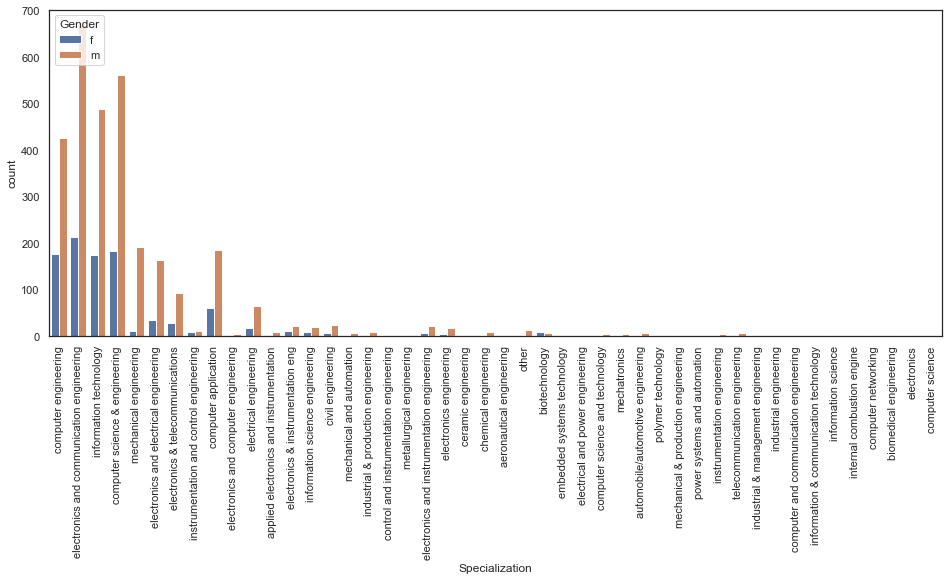

In [105]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(data=data, x='Specialization', hue='Gender')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


`Observation :`We can see male and female ratio with respect to specialization column, number of male ratio is higher in every domain if you observe both male and female are choosing mostely with computer science and electronics groups, because pattern trends tells most of the jobs are available in those feilds.
